In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy.interpolate import interp1d

from dynesty_orbits_Sergey import prior_transform, model, get_interpol

In [2]:
theo_params = np.array([11.5, 12, 0.8, 
                        -60, 0, 0, 0, 100, 0, 
                        1.2, 0., 1., 1.])
x_data, y_data = model(theo_params, type='data')
x_model, y_model = model(theo_params, type='model')


In [18]:
r     = np.sqrt(x_data**2 + y_data**2)
theta = np.unwrap( np.arctan2(x_data, y_data) )

r_mean = (r[1:] + r[:-1])/2
dtheta = np.diff(theta)

rdtheta = r_mean * abs(dtheta)

x_mean = (x_data[1:] + x_data[:-1])/2
y_mean = (y_data[1:] + y_data[:-1])/2

f_x = interp1d(rdtheta, x_mean, kind='linear')
f_y = interp1d(rdtheta, y_mean, kind='linear')

NN = 100
gamma = np.linspace(rdtheta.min(), rdtheta.max(), NN)

theta_x_data = f_x(gamma)
theta_y_data = f_y(gamma)

In [39]:
s_step = rdtheta.sum() / NN

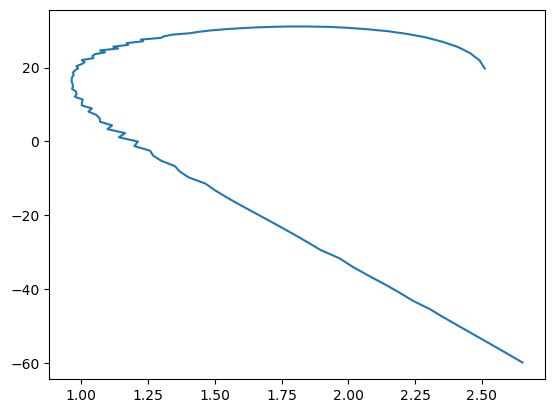

In [44]:
plt.plot(rdtheta, x_mean)

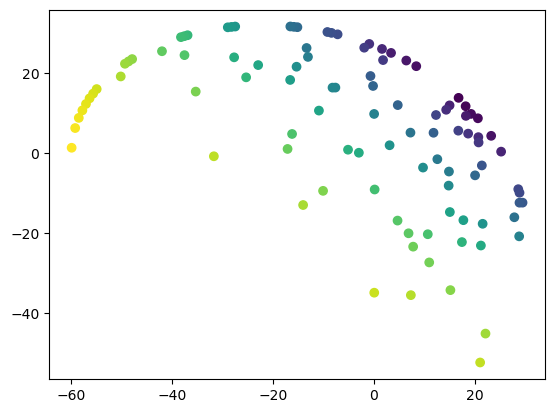

In [19]:
plt.scatter(theta_x_data, theta_y_data, c=gamma, cmap='viridis')

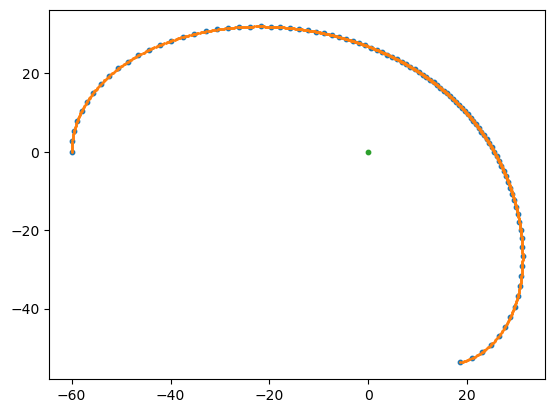

In [16]:
plt.scatter(x_data, y_data, s=10)
plt.scatter(x_model, y_model, s=1)
plt.scatter(0,0,s=10)

In [4]:
p_data = np.random.uniform(0, 1, ndim)

params = prior_transform(p_data)


theo_params = np.array([11.5, 12, 0.8, 
                        -70, 0, 0, 0, 250, 0, 
                        1.2, 0., 1., 1.])


x_data, y_data  = model(theo_params)

sigma = 3
noise = np.random.normal(0, sigma, len(x_data))

r_data = np.sqrt(x_data**2 + y_data**2) + noise
theta_data = np.unwrap( np.arctan2(y_data, x_data) )

get_interpol(theta_data, r_data)

In [13]:
3*np.pi // (2*np.pi)

1.0

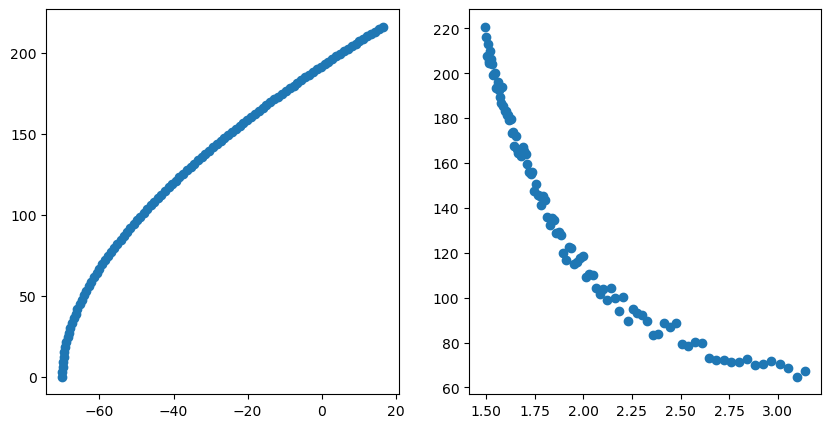

In [5]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x_data, y_data, 'o')
plt.subplot(1, 2, 2)
plt.plot(theta_data,r_data, 'o')

In [36]:
theta_data*-1

array([ 3.10528422,  3.11301984,  3.12062411,  3.12809693,  3.13543781,
        3.14264582,  3.1497195 ,  3.15665688,  3.16345536,  3.17011163,
        3.17662161,  3.18298031,  3.18918171,  3.19521857,  3.20108226,
        3.2067625 ,  3.21224705,  3.21752136,  3.22256811,  3.22736661,
        3.23189208,  3.23611471,  3.23999846,  3.24349951,  3.24656411,
        3.24912589,  3.25110205,  3.25238812,  3.25285072,  3.25231697,
        3.25055911,  3.24727116,  3.24203265,  3.2342501 ,  3.22305843,
        3.20714652,  3.18442863,  3.15137702,  3.10152975,  3.02171753,
        2.88091509,  2.59180974,  1.9213882 ,  0.98631839,  0.38880334,
        0.02873874, -0.1972963 , -0.34548065, -0.44765573, -0.52137201,
       -0.57655431, -0.61908193, -0.65260993, -0.67951288, -0.70139382,
       -0.71937143, -0.73424886, -0.74661704, -0.75692006, -0.76549786,
       -0.77261487, -0.77847963, -0.78325868, -0.78708637, -0.79007214,
       -0.79230581, -0.79386159, -0.79480114, -0.7951759 , -0.79

In [47]:
from scipy.spatial.transform import Rotation

def get_mat(x, y, z):
    v1 = np.array([0, 0, 1])
    v2 = np.array([x, y, z])
    v2 = v2 / np.sum(v2**2)**.5
    angle = np.arccos(np.sum(v1 * v2))
    v3 = np.cross(v1, v2)
    v3 = v3 / np.sum(v3**2)**.5
    return Rotation.from_rotvec(angle * v3).as_matrix()

get_mat(0,1,1)

array([[ 1.        , -0.        ,  0.        ],
       [ 0.        ,  0.70710678,  0.70710678],
       [-0.        , -0.70710678,  0.70710678]])

In [31]:
r_data = np.sqrt(x_data**2 + y_data**2)
theta_data = np.unwrap( np.arctan2(y_data, x_data) )

get_interpol(theta_data, r_data)

ValueError: `x` must be strictly increasing sequence.